In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


*For more information on the dataframe*

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.shape

(891, 12)

*Here, Pclass gives information on the class of the passenger (1st, 2nd, 3rd)*

*SibSp is the siblings/spouses aboard the titanic*

*Parch is the parents/children aboard the titanic*

*Ticket is the ticket number, Fare is the cost of the ticket in USD, Cabin is the cabin number, and embarked is the location at which a particular passenger boarded the titanic*

## Checking for null values

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*177 null entries in age and 687 null entries in cabin and 2 null in embarked*

*We can replace null age values with the median value for a continuous data distribution*

In [6]:
titanic.loc[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
titanic.Age = titanic.Age.fillna(titanic.Age.median())
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


*Now we remove the redundant columns (useless for the prediction)*

In [8]:
titanic = titanic.drop(["Cabin", "Name", "PassengerId"], axis = 1)

In [9]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

*Embarked is the only category with 2 null values, these can be dropped as they do not affect the dataset much as a whole*

In [10]:
titanic.Embarked.dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [11]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


*Now we check the number of entries in each column*

In [12]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
titanic.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

*Now we plot the census*

*Embarked census*

<BarContainer object of 3 artists>

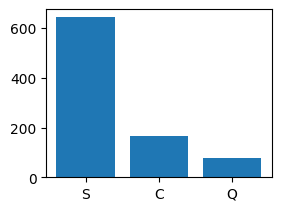

In [16]:
plt.subplot(2,2,1)

plt.bar(titanic.Embarked.value_counts().index, titanic.Embarked.value_counts().values)

*Sex census*

<BarContainer object of 2 artists>

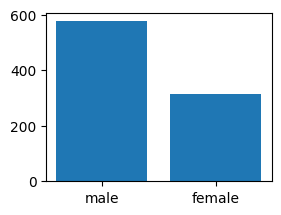

In [17]:
plt.subplot(2,2,2)

plt.bar(titanic.Sex.value_counts().index, titanic.Sex.value_counts().values)

*Pclass census*

<BarContainer object of 3 artists>

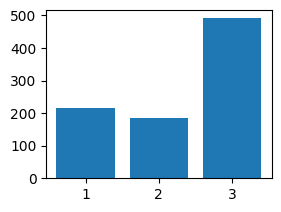

In [18]:
plt.subplot(2,2,3)

plt.bar(titanic.Pclass.value_counts().index, titanic.Pclass.value_counts().values)

*According to the plots, we understand that the number of male passengers is much higher than that of the female passengers*

## Feature engineering the ticket feature

*Sorting the data in descending order of number of people per ticket*

In [19]:
titanic.groupby("Ticket")["Ticket"].count().sort_values(ascending = False)

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
3101295     6
           ..
112052      1
112050      1
111428      1
111427      1
111426      1
Name: Ticket, Length: 681, dtype: int64

*A large number of the entries are single person tickets*

*This can be due to families/groups purchasing a ticket together*

In [20]:
titanic.Ticket.apply(lambda x : 'PC' if x.startswith('PC') else 'Other').value_counts()

Ticket
Other    831
PC        60
Name: count, dtype: int64

*The number of PC tickets are a very small fraction of the single tickets, thus, we can drop them*

In [21]:
titanic = titanic.drop(["Ticket"], axis = 1)

## Now we need to encode the data as we have categorical values in Embarked

In [22]:
titanic = pd.get_dummies(titanic, drop_first = True)

In [23]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


*Now we check the correlation*

In [24]:
dfcorr = titanic.corr()
dfcorr

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.081720
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.014665
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.070941
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.166603
Sex_male,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.125722
Embarked_Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.014665,0.070941,0.063036,-0.166603,0.125722,-0.496624,1.000000


*We can better visualise this correlation via a heatmap*

<Axes: >

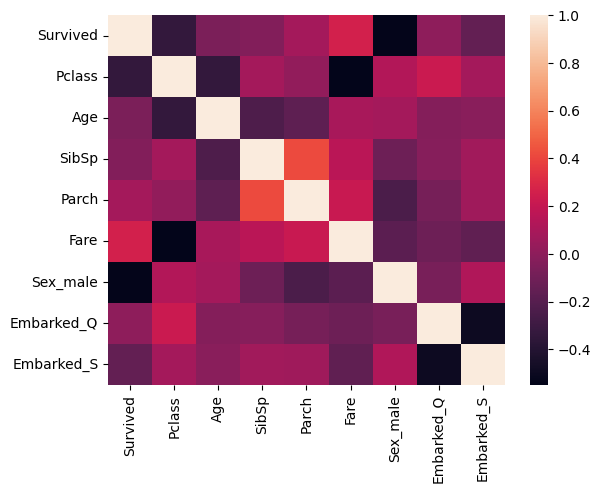

In [25]:
sns.heatmap(dfcorr)

*Here, Sex_male has a strong negative correlation with Survived, which means that very few males survived*

*Embarked has little to no change in the regression model, suggesting that it can be removed*

*Pclass and Fare have a strong negative correlation with Survived, which means that people with a better ticket had a better chance at survival*

*Pclass and Fare are strongly correlated with each other*

<Axes: xlabel='Pclass', ylabel='Fare'>

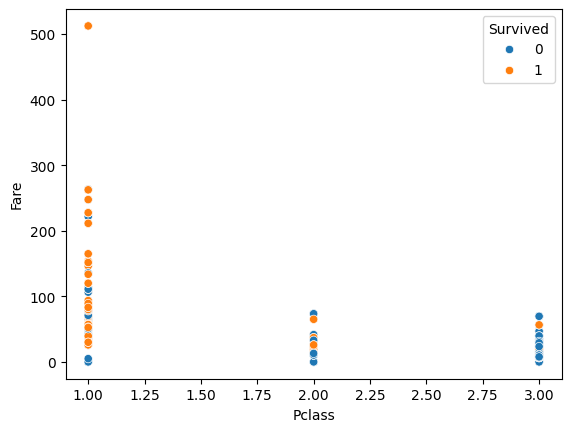

In [26]:
sns.scatterplot(data = titanic, x = 'Pclass', y = 'Fare', hue = 'Survived')

*We can see that many of the first class passengers survived but the third class passengers didnt*

## Feature Selection

In [27]:
titanic = titanic.drop(["SibSp"], axis = 1)
titanic

,Survived,Pclass,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,0,7.2500,True,False,True
1,1,1,38.0,0,71.2833,False,False,False
2,1,3,26.0,0,7.9250,False,False,True
3,1,1,35.0,0,53.1000,False,False,True
4,0,3,35.0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,13.0000,True,False,True
887,1,1,19.0,0,30.0000,False,False,True
888,0,3,28.0,2,23.4500,False,False,True
889,1,1,26.0,0,30.0000,True,False,False


*Fare distribution*

<Axes: xlabel='Fare', ylabel='Count'>

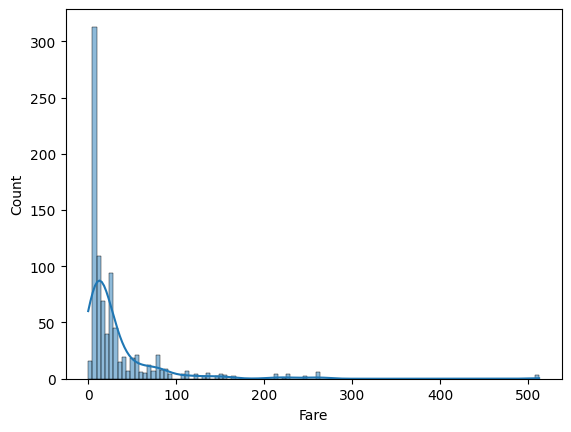

In [28]:
sns.histplot(titanic['Fare'], kde = True)

*According to this plot we can see that a majority of people purchased cheaper tickets*

## Normalising the plot...

In [29]:
feature_toscale = ['Age', 'Fare']

for column in feature_toscale:
    titanic[column] = (titanic[column] - titanic[column].min())/(titanic[column].max() - titanic[column].min())

titanic

,Survived,Pclass,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,0.271174,0,0.014151,True,False,True
1,1,1,0.472229,0,0.139136,False,False,False
2,1,3,0.321438,0,0.015469,False,False,True
3,1,1,0.434531,0,0.103644,False,False,True
4,0,3,0.434531,0,0.015713,True,False,True
...,...,...,...,...,...,...,...,...
886,0,2,0.334004,0,0.025374,True,False,True
887,1,1,0.233476,0,0.058556,False,False,True
888,0,3,0.346569,2,0.045771,False,False,True
889,1,1,0.321438,0,0.058556,True,False,False


<Axes: xlabel='Fare', ylabel='Count'>

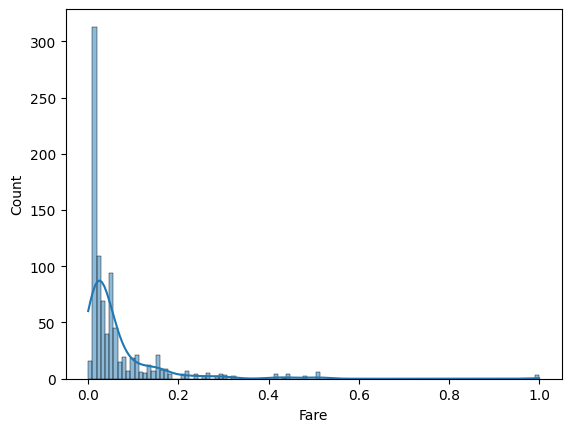

In [30]:
sns.histplot(titanic['Fare'], kde = True)

In [31]:
titanic.shape
#shows us the shape of the dataframe after feature scaling

(891, 8)

## Splitting into training and testing sets

In [32]:
df_shuffled  = titanic.sample(frac = 1 ,random_state = 43 ).reset_index(drop = True)
## taking a random train data split of 80% of 891 samples
X_train = df_shuffled.iloc[:int(0.8*titanic.shape[0]) ,1: ]
X_test = df_shuffled.iloc[int(0.8*titanic.shape[0]): ,1: ]
Y_train  = df_shuffled.iloc[:int(0.8*titanic.shape[0]) ,0 ]
Y_test  = df_shuffled.iloc[int(0.8*titanic.shape[0]): ,0 ]
X_train

,Pclass,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.296306,0,0.018543,True,False,True
1,1,0.195778,1,0.076904,False,False,True
2,2,0.220910,0,0.022447,True,False,True
3,3,0.271174,0,0.015127,False,False,True
4,3,0.032420,2,0.061264,True,False,True
...,...,...,...,...,...,...,...
707,3,0.880623,0,0.015127,True,True,False
708,1,0.623021,1,0.483128,False,False,False
709,3,0.283740,0,0.014737,False,False,True
710,2,0.032420,1,0.036598,True,False,True


In [33]:
from LogReg import LogisticRegression

In [34]:
class Metrics:

    def __init__(self , y_actual , y_pred):
        self.y_actual = np.array(y_actual)
        self.y_pred = np.array(y_pred)
        self.TP = np.sum((self.y_actual == 1) & (self.y_pred == 1))
        self.TN = np.sum((self.y_actual == 0) & (self.y_pred == 0))
        self.FP = np.sum((self.y_actual == 0) & (self.y_pred == 1))
        self.FN = np.sum((self.y_actual == 1) & (self.y_pred == 0))
   
    def accuracy(self):
        
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        
    def precision(self):
         return self.TP / (self.TP + self.FP)
    def recall(self):
        return self.TP / (self.TP + self.FN)

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()
        return 2 * (precision * recall) / (precision + recall)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

metric = Metrics(Y_test, y_pred)
print("accuracy", metric.accuracy())
print("precision", metric.precision())
print("recall", metric.recall())
print("f1_score", metric.f1_score())

accuracy 0.8268156424581006
precision 0.8208955223880597
recall 0.7432432432432432
f1_score 0.7801418439716312


## Now we plot the cost vs epoch graph to check the behaviour of the cost function wrt iterations

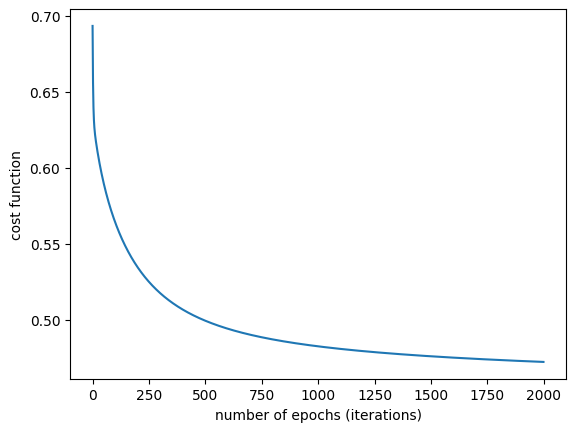

In [38]:
plt.plot(range(logreg.n_iters), logreg.costs, label = "costs vs epoch")
plt.xlabel("number of epochs (iterations)")
plt.ylabel("cost function")
plt.show()

*This is a check to make sure the cost function has been minimised*